Here we will explore Correlations between BTC Metrics & BTCA 15 Ficas Active Crypto ETP, Active discretionary trading top 15 cryptos & fiat: BTC ETH MATIC AVAX SOL DOT NEO TRX XLM XTZ ADA EOS BNB LTC XRP.

It is a no brainer that BTC's price action dictates the trend in the overall market, hence when considering bid/ask spreads, volumes and volatility we will rely on BTC's volume, bid/ask and volatility data along with the crypto prices we investigate.

Volume, bid/ask and volatility's data is downloaded on https://data.bitcoinity.org/bitcoin/.
We made sure to download daily data from 21 FEB 2017 to 20 FEB 2022.

Bitcoin + Altcoins historical price data is download from yahooFinance with the module yfinance. If you run these notebooks make sure to pip install yfinance.
We made sure to download daily data from 21 FEB 2017 to 20 FEB 2022.



In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Dates from FEB 21 2017 to FEB 20 2022

BTC Bid Ask Dataset

In [32]:
btc_bid_ask_spread = pd.read_csv(r'C:\Users\Fluffy\Desktop\Projects Coding\EDA_ETP_Amun21\bitcoinity BTC only Volume Volatility ETC\bitcoinity_data_BTC_BIDASKSPREAD_21FEB2017_20FEB2022.csv')

#Resaving to get rid of the header cryptocompare.com that blocks merging with another DF
btc_bid_ask_spread.to_csv('btc_bid_ask_sp.csv', header=True, index =  True)
btc_bid_ask_sp = pd.read_csv(r'C:\Users\Fluffy\Desktop\Projects Coding\EDA_ETP_Amun21\btc_bid_ask_sp.csv')

#Dropping irrelevant exchanges to keep main ones, big players
btc_bid_ask_sp.drop(columns=['itbit','btce','okcoin','bitstamp','others','cex.io'],  inplace= True)
btc_bid_ask_sp.drop(columns=['Unnamed: 0', 'Time'], inplace=True)
btc_bid_ask_sp.rename(columns={"bitfinex":"bitfinex_B/A_Sp", "gemini":"gemini_B/A_Sp", "coinbase":"coinbase_B/A_Sp", "kraken":"kraken_B/A_Sp"}, inplace= True)
btc_bid_ask_sp.head()

,bitfinex_B/A_Sp,coinbase_B/A_Sp,gemini_B/A_Sp,kraken_B/A_Sp
0,0.023603,0.023972,0.034287,0.145045
1,0.024976,0.031878,0.033959,0.190306
2,0.028105,0.028947,0.027275,0.160828
3,0.034259,0.059614,0.061314,0.287392
4,0.029173,0.031632,0.081819,0.288130


BTC Volatility + MarketCap + DailyVolume + Hashrate

Liquidity being a crucial aspect of financial markets, it is best monitored by following VOLUME data along with BID ASK

In [33]:
#VOLATILITY Dataframe
btc_volatility_df = pd.read_csv(r'C:\Users\Fluffy\Desktop\Projects Coding\EDA_ETP_Amun21\bitcoinity BTC only Volume Volatility ETC\bitcoinity_data_VOLATILITY_21FEB2017_20FEB2022.csv')
#Dropping irrelevant exchanges
btc_volatility_df.drop(columns=['Time','campbx', 'itbit','btce','cex.io', 'hitbtc','therocktrading', 'okcoin', 'bitstamp','bit-x','bitbay','exmo'], inplace = True)
#Renaming columns for more clarity 
btc_volatility_df.rename(columns={"bitfinex":"bitfinex_Vola", "cex.io":"cex.io_VOLA", "gemini":"gemini_VOLA", "coinbase":"coinbase_VOLA", "kraken":"kraken_VOLA"}, inplace= True)
btc_volatility_df


#MARKET_CAP Dataframe
btc_mc_df = pd.read_csv(r'C:\Users\Fluffy\Desktop\Projects Coding\EDA_ETP_Amun21\bitcoinity BTC only Volume Volatility ETC\bitcoinity_data_BTC_MC_21FEB2017_20FEB2022.csv')
#Scaling / Normalizing the MKT CAP column data
btc_mc_df

#PRICE + VOLUME Dataframe 
btc_price_volume_df = pd.read_csv(r'C:\Users\Fluffy\Desktop\Projects Coding\EDA_ETP_Amun21\bitcoinity BTC only Volume Volatility ETC\bitcoinity_data_PRICE+VOL_21FEB2017_20FEB2022.csv')
btc_price_volume_df

#TRADE VOLUME Dataframe
btc_trade_volume = pd.read_csv(r'C:\Users\Fluffy\Desktop\Projects Coding\EDA_ETP_Amun21\bitcoinity BTC only Volume Volatility ETC\bitcoinity_data_trade_volume_daily_21FEB2017_20FEB2022.csv')
btc_trade_volume.drop(columns=['Time','bit-x','bitflyer','okcoin','bitstamp','bithumb', 'others'], inplace = True)

#Renaming columns for more clarity 
btc_trade_volume.rename(columns={"bitfinex":"bitfinex_TradVol",  "gemini":"gemini_TradVol", "coinbase":"coinbase_TradVol", "kraken":"kraken_TradVol"}, inplace= True)

# #Adding DELTA for VOLUME Changes on each exchange  
btc_trade_volume['bitfinex_DELTA_TradeVolume'] = (btc_trade_volume['bitfinex_TradVol'] - btc_trade_volume['bitfinex_TradVol'].shift(-1))
btc_trade_volume['gemini_DELTA_TradeVolume'] = (btc_trade_volume['gemini_TradVol'] - btc_trade_volume['gemini_TradVol'].shift(-1))
btc_trade_volume['kraken_DELTA_TradeVolume'] = (btc_trade_volume['kraken_TradVol'] - btc_trade_volume['kraken_TradVol'].shift(-1))
btc_trade_volume['coinbase_DELTA_TradeVolume'] = (btc_trade_volume['coinbase_TradVol'] - btc_trade_volume['coinbase_TradVol'].shift(-1))

btc_trade_volume.head()

,bitfinex_TradVol,coinbase_TradVol,gemini_TradVol,kraken_TradVol,bitfinex_DELTA_TradeVolume,gemini_DELTA_TradeVolume,kraken_DELTA_TradeVolume,coinbase_DELTA_TradeVolume
0,23340.104197,8140.190522,3738.592754,13760.791090,9014.139548,-358.750612,3041.315558,1279.453349
1,14325.964649,6860.737172,4097.343366,10719.475532,-11829.682301,-619.777906,-3375.463253,-1821.631284
2,26155.646950,8682.368457,4717.121271,14094.938785,-22039.087338,-3942.035382,-8346.202561,-5570.742978
3,48194.734288,14253.111435,8659.156653,22441.141346,31910.032205,6188.079354,12186.276346,7534.388947
4,16284.702084,6718.722488,2471.077299,10254.864999,5203.655667,43.292397,2517.345670,1858.435367


In the cell below, we merge all dataframe, BTC Price & Volume + MC + Volatility + Trade Volume + Bid Ask Spread

In [34]:
# result = pd.concat([df1, df4], axis=1, join="inner")
A = pd.concat([btc_price_volume_df, btc_trade_volume] , axis = 1, join = "inner")
B = pd.concat([A, btc_volatility_df], axis = 1 , join = "inner")


btc_metrics = pd.concat([B, btc_bid_ask_sp], axis= 1, join = "inner")
btc_metrics.drop(columns=['Time'], inplace = True)

btc_metrics.to_csv('btc_metrics.csv')

btc_metrics.tail()

,price,volume,bitfinex_TradVol,coinbase_TradVol,gemini_TradVol,kraken_TradVol,bitfinex_DELTA_TradeVolume,gemini_DELTA_TradeVolume,kraken_DELTA_TradeVolume,coinbase_DELTA_TradeVolume,bitfinex_Vola,coinbase_VOLA,gemini_VOLA,kraken_VOLA,bitfinex_B/A_Sp,coinbase_B/A_Sp,gemini_B/A_Sp,kraken_B/A_Sp
1821,44104.455805,7.381284e+08,3271.185668,11379.968441,759.144479,3512.796168,-3479.190998,-840.217173,-2448.932978,-10388.474876,73.100968,70.257757,71.122768,71.159057,0.005011,0.001453,0.009919,0.001359
1822,42777.506300,1.400839e+09,6750.376666,21768.443317,1599.361652,5961.729146,2094.589558,259.319339,1375.905422,3023.912558,107.103840,107.167009,106.436344,105.242998,0.005725,0.001930,0.012209,0.004564
1823,40542.517535,1.113515e+09,4655.787108,18744.530759,1340.042313,4585.823724,3191.532939,1000.120343,2945.430055,11740.719632,103.088964,101.740897,103.060015,104.954672,0.006719,0.002595,0.015235,0.003752
1824,40228.975656,3.901324e+08,1464.254169,7003.811127,339.921970,1640.393669,-2062.570982,-395.578765,-2531.070626,-5604.354648,60.882817,59.242272,58.928462,57.456096,0.005580,NaN,0.011158,0.001908
1825,38924.016908,7.516132e+08,3526.825152,12608.165776,735.500735,4171.464295,NaN,NaN,NaN,NaN,81.175609,80.644789,82.480153,80.441120,0.008394,0.002497,0.013475,0.003353


Exxploring Correlations between BTC & Volatility, Trading Volume , BidAsk Spread

In [35]:

import seaborn as sns
import pandas as pd
from sklearn import preprocessing

#Setting diagonal correlation style
sns.set(style = "white")

#Scaling Normalizing before Correlation
x = btc_metrics.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
btc_metrics_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(btc_metrics_scaled)

#Computing the correlation
col_list =['price',	'volume','bitfinex_TradVol','coinbase_TradVol','gemini_TradVol','kraken_TradVol','bitfinex_DELTA_TradeVolume','gemini_DELTA_TradeVolume','kraken_DELTA_TradeVolume','coinbase_DELTA_TradeVolume','bitfinex_Vola','coinbase_VOLA','gemini_VOLA','kraken_VOLA','bitfinex_B/A_Sp','coinbase_B/A_Sp',	'gemini_B/A_Sp',	'kraken_B/A_Sp']
btc_metrics_corr = pd.DataFrame(btc_metrics_scaled, columns= col_list)
btc_metrics_corr_df = btc_metrics_corr.corr()
btc_metrics_corr_df

,price,volume,bitfinex_TradVol,coinbase_TradVol,gemini_TradVol,kraken_TradVol,bitfinex_DELTA_TradeVolume,gemini_DELTA_TradeVolume,kraken_DELTA_TradeVolume,coinbase_DELTA_TradeVolume,bitfinex_Vola,coinbase_VOLA,gemini_VOLA,kraken_VOLA,bitfinex_B/A_Sp,coinbase_B/A_Sp,gemini_B/A_Sp,kraken_B/A_Sp
price,1.000000,0.627990,-0.273270,0.136505,-0.259480,-0.243313,-0.004638,-0.004096,-0.004595,-0.006243,0.830996,0.817262,0.823042,0.820613,-0.232251,-0.134279,-0.101682,-0.365611
volume,0.627990,1.000000,0.273126,0.711978,0.229358,0.295549,0.192428,0.178817,0.220440,0.265914,0.912538,0.919873,0.916437,0.914013,0.065105,0.018342,0.248944,-0.134630
bitfinex_TradVol,-0.273270,0.273126,1.000000,0.558861,0.795494,0.630909,0.343400,0.273118,0.264696,0.249262,0.003200,0.008823,0.003944,-0.000282,0.411862,0.179691,0.260181,0.415279
coinbase_TradVol,0.136505,0.711978,0.558861,1.000000,0.566892,0.761210,0.330647,0.319204,0.388382,0.427786,0.506316,0.527965,0.518565,0.514059,0.300180,0.233783,0.513057,0.080885
gemini_TradVol,-0.259480,0.229358,0.795494,0.566892,1.000000,0.708584,0.285442,0.384974,0.275499,0.268893,0.014673,0.025166,0.019059,0.012760,0.623769,0.267983,0.147684,0.460251
kraken_TradVol,-0.243313,0.295549,0.630909,0.761210,0.708584,1.000000,0.307452,0.298600,0.406658,0.347198,0.077736,0.098195,0.089852,0.093302,0.504969,0.335884,0.432369,0.350179
bitfinex_DELTA_TradeVolume,-0.004638,0.192428,0.343400,0.330647,0.285442,0.307452,1.000000,0.768010,0.763578,0.749692,0.112353,0.122727,0.117954,0.114509,0.122566,0.132714,0.204924,0.070330
gemini_DELTA_TradeVolume,-0.004096,0.178817,0.273118,0.319204,0.384974,0.298600,0.768010,1.000000,0.724016,0.721213,0.106067,0.118737,0.114182,0.108388,0.115217,0.117502,0.154726,0.064374
kraken_DELTA_TradeVolume,-0.004595,0.220440,0.264696,0.388382,0.275499,0.406658,0.763578,0.724016,1.000000,0.881020,0.135736,0.147653,0.142479,0.141052,0.121940,0.145900,0.225801,0.054705
coinbase_DELTA_TradeVolume,-0.006243,0.265914,0.249262,0.427786,0.268893,0.347198,0.749692,0.721213,0.881020,1.000000,0.172076,0.188947,0.181390,0.177247,0.126780,0.137449,0.247425,0.060213


'\nhttps://www.pluralsight.com/guides/finding-relationships-data-with-python\nhttps://www.kaggle.com/janiobachmann/time-series-i-an-introductory-start/report\n'

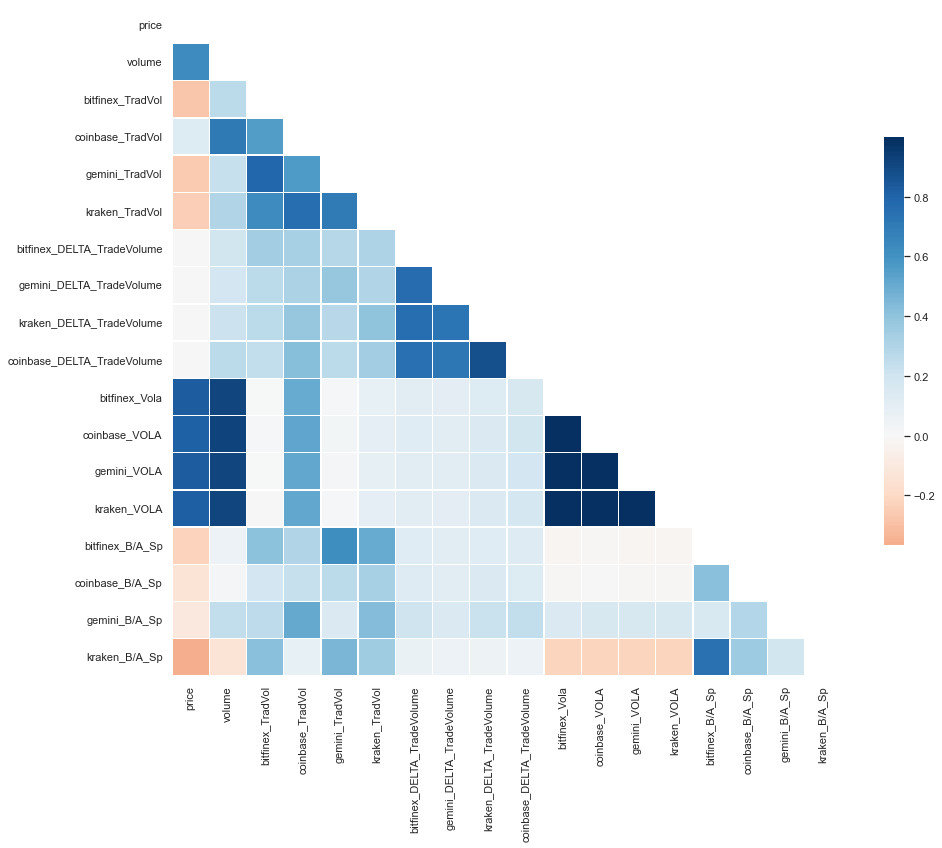

In [36]:

#Generate a mask for upper triangle of the matrix 
mask = np.triu(np.ones_like(btc_metrics_corr_df, dtype=np.bool))

f, ax = plt.subplots(figsize=(15,15))
#Generate a custom diverging colormap
cmap = "RdBu"

sns.heatmap(
    btc_metrics_corr_df,
    mask = mask,
    cmap = cmap,
    center = 0,
    square = True,
    linewidths = 0.5, 
    cbar_kws={"shrink": 0.5}
)

"""
https://www.pluralsight.com/guides/finding-relationships-data-with-python
https://www.kaggle.com/janiobachmann/time-series-i-an-introductory-start/report
"""

As seen on file #4, the strongest correlations imply packaged ETPs, and the negative correlations are obvious ones between HODLX, HODLV & the SBTC short BTC ETP.

This shows that the packaged ETPs 15, 10 & ETP 5 are very reactive to changes in BTC price action, therefore we should explore correlation between these packaged ETPs and the BTC metrics we have above.

To do so, we collect price data for altcoins packaged in the ETP 15 Ficas Active Crypto to associate with BTC metrics for correlation exploration.

Correlations ETP 15 Ficas Active Crypto & BTC Market Metrics.

In [37]:
import yfinance as yf

#List of altcoin pairs in the ETP
#For Polkadot, I wrote DOT-CAD because the USD pair gives no data.
fifteen_ficas_active_crypto = ['BTC-USD', 'ETH-USD', 'MATIC-USD', 'AVAX-USD', 'SOL-USD', 'NEO-USD', 'TRX-USD', 'XLM-USD', 'XTZ-USD', 'ADA-USD', 'EOS-USD', 'BNB-USD', 'LTC-USD', 'XRP-USD', 'DOT-CAD']
fifteen_ficas_active_crypto_temp = yf.download(fifteen_ficas_active_crypto, start = "2017-02-21", end = "2022-02-20", data_source = "yahoo")
fifteen_ficas_active_crypto_temp.drop(columns = ['Volume', 'Open', 'Close','Low', 'High'], inplace= True)

fifteen_ficas_active_crypto_temp


[*********************100%***********************]  15 of 15 completed


Adj Close                                                   \
             ADA-USD    AVAX-USD     BNB-USD       BTC-USD    DOT-CAD   
Date                                                                    
2017-02-21       NaN         NaN         NaN   1115.300049        NaN   
2017-02-22       NaN         NaN         NaN   1117.439941        NaN   
2017-02-23       NaN         NaN         NaN   1166.719971        NaN   
2017-02-24       NaN         NaN         NaN   1173.680054        NaN   
2017-02-25       NaN         NaN         NaN   1143.839966        NaN   
2017-02-26       NaN         NaN         NaN   1165.199951        NaN   
2017-02-27       NaN         NaN         NaN   1179.969971        NaN   
2017-02-28       NaN         NaN         NaN   1179.969971        NaN   
2017-03-01       NaN         NaN         NaN   1222.500000        NaN   
2017-03-02       NaN         NaN         NaN   1251.010010        NaN   
2017-03-03       NaN         NaN         NaN   1274.989990        NaN   
2017-03-04       NaN         NaN         NaN   1255.150024        NaN   
2017-03-05       NaN         NaN         NaN   1267.119995        NaN   
2017-03-06       NaN         NaN         NaN   1272.829956        NaN   
2017-03-07       NaN         NaN         NaN   1223.540039        NaN   
2017-03-08       NaN         NaN         NaN   1150.000000        NaN   
2017-03-09       NaN         NaN         NaN   1188.489990        NaN   
2017-03-10       NaN         NaN         NaN   1116.719971        NaN   
2017-03-11       NaN         NaN         NaN   1175.829956        NaN   
2017-03-12       NaN         NaN         NaN   1221.380005        NaN   
2017-03-13       NaN         NaN         NaN   1231.920044        NaN   
2017-03-14       NaN         NaN         NaN   1240.000000        NaN   
2017-03-15       NaN         NaN         NaN   1249.609985        NaN   
2017-03-16       NaN         NaN         NaN   1187.810059        NaN   
2017-03-17       NaN         NaN         NaN   1100.229980        NaN   
2017-03-18       NaN         NaN         NaN    973.817993        NaN   
2017-03-19       NaN         NaN         NaN   1036.739990        NaN   
2017-03-20       NaN         NaN         NaN   1054.229980        NaN   
2017-03-21       NaN         NaN         NaN   1120.540039        NaN   
2017-03-22       NaN         NaN         NaN   1049.140015        NaN   
2017-03-23       NaN         NaN         NaN   1038.589966        NaN   
2017-03-24       NaN         NaN         NaN    937.520020        NaN   
2017-03-25       NaN         NaN         NaN    972.778992        NaN   
2017-03-26       NaN         NaN         NaN    966.724976        NaN   
2017-03-27       NaN         NaN         NaN   1045.770020        NaN   
2017-03-28       NaN         NaN         NaN   1047.150024        NaN   
2017-03-29       NaN         NaN         NaN   1039.969971        NaN   
2017-03-30       NaN         NaN         NaN   1026.430054        NaN   
2017-03-31       NaN         NaN         NaN   1071.790039        NaN   
2017-04-01       NaN         NaN         NaN   1080.500000        NaN   
2017-04-02       NaN         NaN         NaN   1102.170044        NaN   
2017-04-03       NaN         NaN         NaN   1143.810059        NaN   
2017-04-04       NaN         NaN         NaN   1133.250000        NaN   
2017-04-05       NaN         NaN         NaN   1124.780029        NaN   
2017-04-06       NaN         NaN         NaN   1182.680054        NaN   
2017-04-07       NaN         NaN         NaN   1176.900024        NaN   
2017-04-08       NaN         NaN         NaN   1175.949951        NaN   
2017-04-09       NaN         NaN         NaN   1187.869995        NaN   
2017-04-10       NaN         NaN         NaN   1187.130005        NaN   
2017-04-11       NaN         NaN         NaN   1205.010010        NaN   
2017-04-12       NaN         NaN         NaN   1200.369995        NaN   
2017-04-13       NaN         NaN         NaN   1169.280029        NaN

In [38]:
#Creating a Date column to merge with the btc_metrics DF
btc_metrics['Date'] = fifteen_ficas_active_crypto_temp.index
#Reordering to put new Date column in front
btc_metrics[['Date','price','volume','bitfinex_TradVol','coinbase_TradVol',	'gemini_TradVol','kraken_TradVol','bitfinex_DELTA_TradeVolume','gemini_DELTA_TradeVolume','kraken_DELTA_TradeVolume','coinbase_DELTA_TradeVolume','bitfinex_Vola','coinbase_VOLA','gemini_VOLA','kraken_VOLA','bitfinex_B/A_Sp','coinbase_B/A_Sp','gemini_B/A_Sp','kraken_B/A_Sp']]
btc_metrics_and_15 = pd.merge(btc_metrics, fifteen_ficas_active_crypto_temp, how = 'right', on =['Date', 'Date'])
# btc_metrics_and_15.drop(columns=['X'], inplace=True)
#Renaming some columns btc_metrics_and_15 for better readability
btc_metrics_and_15.columns = [                     'BTC_price',                     'BTC_volume',
                 'bitfinex_TradVol',           'coinbase_TradVol',
                   'gemini_TradVol',             'kraken_TradVol',
       'bitfinex_DELTA_TradeVolume',   'gemini_DELTA_TradeVolume',
         'kraken_DELTA_TradeVolume', 'coinbase_DELTA_TradeVolume',
                    'bitfinex_Vola',              'coinbase_VOLA',
                      'gemini_VOLA',                'kraken_VOLA',
                  'bitfinex_B/A_Sp',            'coinbase_B/A_Sp',
                    'gemini_B/A_Sp',              'kraken_B/A_Sp',
                                                    'Date',
           ('ADA-USD'),    ('AVAX-USD'),
           ('BNB-USD'),     ('BTC-USD'),
           ('DOT-CAD'),     ('EOS-USD'),
           ('ETH-USD'),     ('LTC-USD'),
         ('MATIC-USD'),     ('NEO-USD'),
           ('SOL-USD'),     ('TRX-USD'),
           ('XLM-USD'),     ('XRP-USD'),
           ('XTZ-USD')]
# btc_metrics_and_15 = pd.concat([fifteen_ficas_active_crypto_temp, btc_bid_ask_sp], axis= 1, join = "inner")
btc_metrics_and_15.columns



C:\Users\Fluffy\AppData\Local\Temp/ipykernel_23656/2379834494.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  btc_metrics_and_15 = pd.merge(btc_metrics, fifteen_ficas_active_crypto_temp, how = 'right', on =['Date', 'Date'])


Index(['BTC_price', 'BTC_volume', 'bitfinex_TradVol', 'coinbase_TradVol',
       'gemini_TradVol', 'kraken_TradVol', 'bitfinex_DELTA_TradeVolume',
       'gemini_DELTA_TradeVolume', 'kraken_DELTA_TradeVolume',
       'coinbase_DELTA_TradeVolume', 'bitfinex_Vola', 'coinbase_VOLA',
       'gemini_VOLA', 'kraken_VOLA', 'bitfinex_B/A_Sp', 'coinbase_B/A_Sp',
       'gemini_B/A_Sp', 'kraken_B/A_Sp', 'Date', 'ADA-USD', 'AVAX-USD',
       'BNB-USD', 'BTC-USD', 'DOT-CAD', 'EOS-USD', 'ETH-USD', 'LTC-USD',
       'MATIC-USD', 'NEO-USD', 'SOL-USD', 'TRX-USD', 'XLM-USD', 'XRP-USD',
       'XTZ-USD'],
      dtype='object')

Building our correlation model then Correlation Heatmap !

In [39]:
col_list = btc_metrics_and_15.columns
btc_metrics_and_15_corr = pd.DataFrame(btc_metrics_and_15, columns= col_list)
btc_metrics_and_15_corr_df = btc_metrics_and_15_corr.corr()
btc_metrics_and_15_corr_df

,BTC_price,BTC_volume,bitfinex_TradVol,coinbase_TradVol,gemini_TradVol,kraken_TradVol,bitfinex_DELTA_TradeVolume,gemini_DELTA_TradeVolume,kraken_DELTA_TradeVolume,coinbase_DELTA_TradeVolume,...,EOS-USD,ETH-USD,LTC-USD,MATIC-USD,NEO-USD,SOL-USD,TRX-USD,XLM-USD,XRP-USD,XTZ-USD
BTC_price,1.000000,0.627990,-0.273270,0.136505,-0.259480,-0.243313,-0.004638,-0.004096,-0.004595,-0.006243,...,-0.034703,0.924513,0.756867,0.750511,0.337237,0.671320,0.779358,0.642544,0.562599,0.740447
BTC_volume,0.627990,1.000000,0.273126,0.711978,0.229358,0.295549,0.192428,0.178817,0.220440,0.265914,...,0.113979,0.494164,0.668681,0.337246,0.418808,0.126434,0.448707,0.552763,0.416658,0.477462
bitfinex_TradVol,-0.273270,0.273126,1.000000,0.558861,0.795494,0.630909,0.343400,0.273118,0.264696,0.249262,...,0.328502,-0.175225,0.063830,-0.125370,0.401558,-0.162432,-0.079361,0.156723,0.158627,-0.001637
coinbase_TradVol,0.136505,0.711978,0.558861,1.000000,0.566892,0.761210,0.330647,0.319204,0.388382,0.427786,...,-0.021910,0.064167,0.230221,-0.015358,0.156862,-0.143140,0.009883,0.112078,0.072425,0.079174
gemini_TradVol,-0.259480,0.229358,0.795494,0.566892,1.000000,0.708584,0.285442,0.384974,0.275499,0.268893,...,0.217976,-0.125101,-0.046701,-0.083447,0.338794,-0.209116,-0.052976,0.141050,0.164074,0.014329
kraken_TradVol,-0.243313,0.295549,0.630909,0.761210,0.708584,1.000000,0.307452,0.298600,0.406658,0.347198,...,0.026020,-0.223470,-0.113379,-0.306132,0.112261,-0.398198,-0.194083,-0.033303,-0.091175,-0.159991
bitfinex_DELTA_TradeVolume,-0.004638,0.192428,0.343400,0.330647,0.285442,0.307452,1.000000,0.768010,0.763578,0.749692,...,-0.025735,-0.008856,-0.016510,-0.012046,-0.022326,-0.010012,-0.013230,-0.021138,-0.017569,-0.021682
gemini_DELTA_TradeVolume,-0.004096,0.178817,0.273118,0.319204,0.384974,0.298600,0.768010,1.000000,0.724016,0.721213,...,-0.029801,-0.009816,-0.017579,-0.011470,-0.025190,-0.007872,-0.011657,-0.023731,-0.018742,-0.031618
kraken_DELTA_TradeVolume,-0.004595,0.220440,0.264696,0.388382,0.275499,0.406658,0.763578,0.724016,1.000000,0.881020,...,-0.029093,-0.009387,-0.019697,-0.007922,-0.023248,-0.007629,-0.017245,-0.025098,-0.021371,-0.026697
coinbase_DELTA_TradeVolume,-0.006243,0.265914,0.249262,0.427786,0.268893,0.347198,0.749692,0.721213,0.881020,1.000000,...,-0.027778,-0.011218,-0.021043,-0.010800,-0.022827,-0.010000,-0.016913,-0.022270,-0.019670,-0.028913


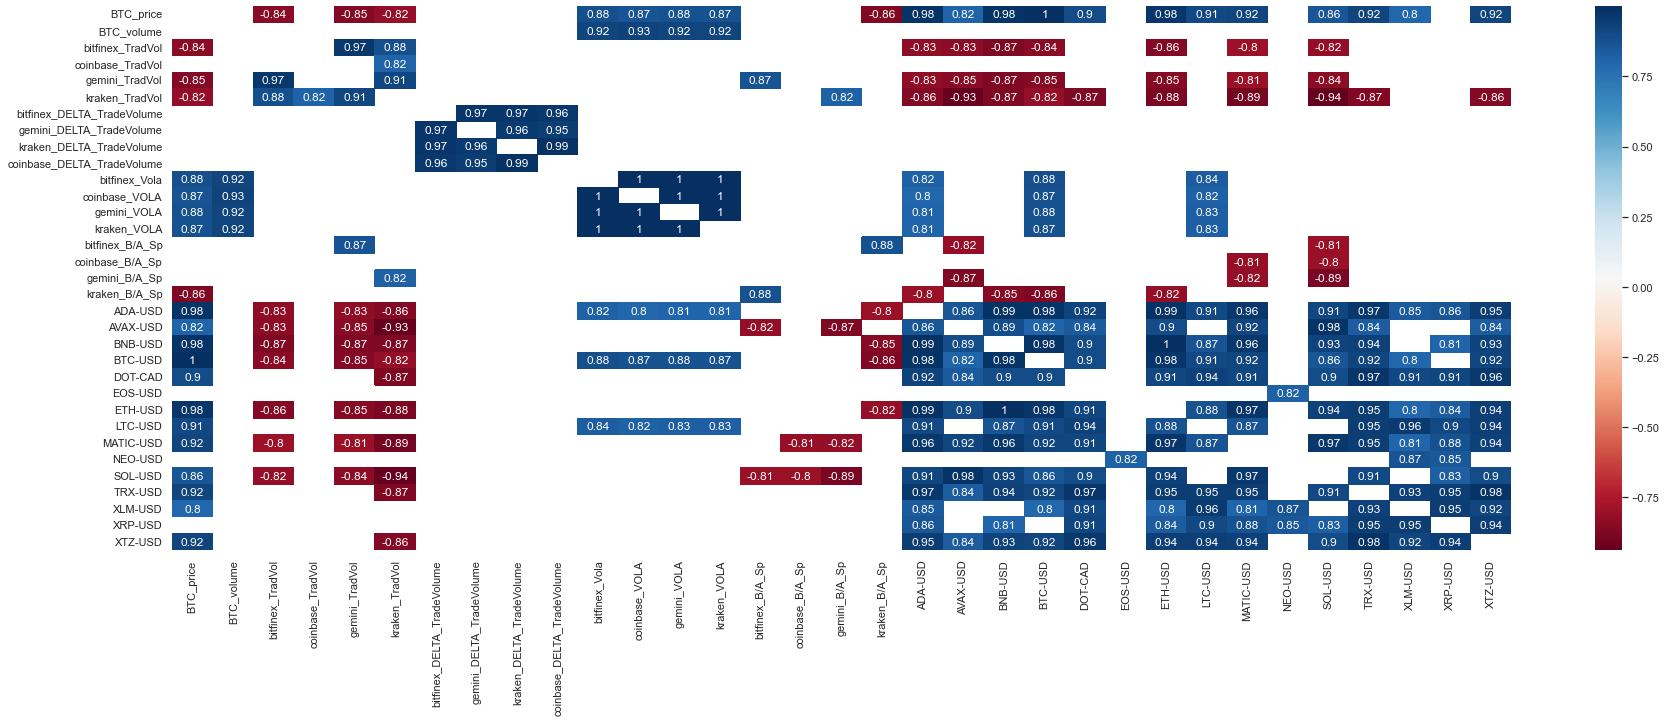

In [40]:
dfCorr = btc_metrics_and_15_corr_df.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="RdBu")
plt.show()

List of strongest Correlations.

In [46]:
import pandas as pd

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

pd.set_option('display.max_rows', None)

print(corrFilter(btc_metrics_and_15_corr_df, .8))

SOL-USD                     kraken_TradVol               -0.937321
kraken_TradVol              AVAX-USD                     -0.929823
                            MATIC-USD                    -0.892667
gemini_B/A_Sp               SOL-USD                      -0.886086
kraken_TradVol              ETH-USD                      -0.878860
                            BNB-USD                      -0.874438
BNB-USD                     bitfinex_TradVol             -0.873799
DOT-CAD                     kraken_TradVol               -0.873071
gemini_B/A_Sp               AVAX-USD                     -0.872123
kraken_TradVol              TRX-USD                      -0.865843
gemini_TradVol              BNB-USD                      -0.865813
kraken_B/A_Sp               BTC_price                    -0.863061
BTC-USD                     kraken_B/A_Sp                -0.863037
ADA-USD                     kraken_TradVol               -0.857526
kraken_TradVol              XTZ-USD                      -0.85